In [20]:
import pickle
from pathlib import Path
import os

import pandas as pd
import numpy as np

from IPython.display import display

## Look for problems:

In [21]:
pickles = os.listdir('./unit_test')
pickles

['BG_unrefined',
 'CS_unrefined',
 'DA_unrefined',
 'DE_unrefined',
 'EL_unrefined',
 'EN_unrefined',
 'ES_unrefined',
 'ET_unrefined',
 'FI_unrefined',
 'FR_unrefined',
 'GA_unrefined',
 'HR_unrefined',
 'HU_unrefined',
 'IT_unrefined',
 'LT_unrefined',
 'LV_unrefined',
 'MT_unrefined',
 'NL_unrefined',
 'PL_unrefined',
 'PT_unrefined',
 'RO_unrefined',
 'SK_unrefined',
 'SL_unrefined',
 'SV_unrefined']

In [22]:
df = pd.DataFrame()

In [23]:
# iterate over pickle
for file in pickles:
    with open('./unit_test/{}'.format(file), 'rb') as f:
        current_dic = pickle.load(f)
    session_list = list(current_dic.keys())
    print(len(session_list))
    print(file[:2])

    #  get the lengths to compare
    output_list = []
    for session in current_dic.keys():
        output_list.append(len(current_dic[session]))
        #print(session)
        #print(len(current_dic[session]))
    df[file[:2]] = output_list

97
BG
97
CS
97
DA
97
DE
97
EL
97
EN
97
ES
97
ET
97
FI
97
FR
97
GA
97
HR
97
HU
97
IT
97
LT
97
LV
97
MT
97
NL
97
PL
97
PT
97
RO
97
SK
97
SL
97
SV


In [24]:
df

,BG,CS,DA,DE,EL,EN,ES,ET,FI,FR,...,LT,LV,MT,NL,PL,PT,RO,SK,SL,SV
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,399,399,399,399,399,399,399,399,399,399,...,399,399,399,399,399,399,399,399,399,399
2,398,398,398,398,398,398,397,398,396,398,...,398,398,398,398,399,398,398,398,397,398
3,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
4,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,406,406,406,406,406,406,406,406,406,406,...,406,406,406,406,406,406,406,406,406,406
93,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
94,662,662,662,662,662,662,662,662,662,662,...,662,662,662,662,662,662,662,662,662,662
95,249,249,249,249,249,249,249,249,249,249,...,249,249,249,249,249,249,249,249,249,249


In [25]:
df['matching'] = df.eq(df.iloc[:, 0], axis=0).all(1)

In [26]:
df['matching'].value_counts()

matching
True     59
False    38
Name: count, dtype: int64

In [27]:
df['index'] = list(current_dic.keys())
df

,BG,CS,DA,DE,EL,EN,ES,ET,FI,FR,...,MT,NL,PL,PT,RO,SK,SL,SV,matching,index
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,True,2008-09-01
1,399,399,399,399,399,399,399,399,399,399,...,399,399,399,399,399,399,399,399,True,2008-09-02
2,398,398,398,398,398,398,397,398,396,398,...,398,398,399,398,398,398,397,398,False,2008-09-03
3,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,True,2008-09-04
4,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,True,2008-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,406,406,406,406,406,406,406,406,406,406,...,406,406,406,406,406,406,406,406,True,2010-04-20
93,174,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,True,2010-04-21
94,662,662,662,662,662,662,662,662,662,662,...,662,662,662,662,662,662,662,662,True,2010-05-05
95,249,249,249,249,249,249,249,249,249,249,...,249,249,249,249,249,249,249,249,True,2010-05-06


In [28]:
df.set_index(df['index'], inplace = True)
#df.drop(['index'], axis = 1)
df.T

index,2008-09-01,2008-09-02,2008-09-03,2008-09-04,2008-09-22,2008-09-23,2008-09-24,2008-09-25,2008-10-08,2008-10-09,...,2010-03-11,2010-03-24,2010-03-25,2010-04-07,2010-04-19,2010-04-20,2010-04-21,2010-05-05,2010-05-06,2010-05-17
BG,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
CS,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
DA,212,399,398,217,192,403,393,184,274,256,...,215,293,282,70,224,406,174,662,249,181
DE,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
EL,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
EN,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
ES,212,399,397,217,192,403,394,184,274,259,...,215,293,282,70,224,406,174,662,249,181
ET,212,399,398,217,192,403,395,185,274,256,...,215,293,282,70,224,406,174,662,249,181
FI,212,399,396,217,192,403,394,184,274,256,...,215,293,282,70,224,406,174,662,249,181
FR,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181


### control

In [29]:
with open('english_unrefined', 'rb') as f:
    english_dic = pickle.load(f)

In [30]:
output_list = []
for session in english_dic.keys():
    output_list.append(len(english_dic[session]))
    print(session)
    print(len(english_dic[session]))
df['englishcontrol'] = output_list 

2008-09-01
212
2008-09-02
399
2008-09-03
398
2008-09-04
217
2008-09-22
192
2008-09-23
403
2008-09-24
395
2008-09-25
184
2008-10-08
274
2008-10-09
256
2008-10-20
243
2008-10-21
494
2008-10-22
446
2008-10-23
191
2008-11-17
194
2008-11-18
403
2008-11-19
394
2008-11-20
250
2008-12-03
271
2008-12-04
202
2008-12-15
235
2008-12-16
477
2008-12-17
477
2008-12-18
245
2009-01-13
390
2009-01-14
482
2009-01-15
200
2009-02-02
202
2009-02-03
479
2009-02-04
375
2009-02-05
219
2009-02-18
308
2009-02-19
277
2009-03-09
214
2009-03-10
511
2009-03-11
458
2009-03-12
288
2009-03-23
185
2009-03-24
493
2009-03-25
410
2009-03-26
198
2009-04-01
272
2009-04-02
268
2009-04-21
227
2009-04-22
445
2009-04-23
447
2009-04-24
188
2009-05-04
207
2009-05-05
399
2009-05-06
459
2009-05-07
229
2009-07-14
28
2009-07-15
179
2009-07-16
6
2009-09-14
178
2009-09-15
266
2009-09-16
278
2009-09-17
254
2009-10-07
247
2009-10-08
151
2009-10-19
114
2009-10-20
425
2009-10-21
308
2009-10-22
226
2009-11-11
288
2009-11-12
145
2009-11-23
16

## List Problems:

In [31]:
df.T.to_csv('overview_of_irregularities.csv')

In [32]:
df.T

index,2008-09-01,2008-09-02,2008-09-03,2008-09-04,2008-09-22,2008-09-23,2008-09-24,2008-09-25,2008-10-08,2008-10-09,...,2010-03-11,2010-03-24,2010-03-25,2010-04-07,2010-04-19,2010-04-20,2010-04-21,2010-05-05,2010-05-06,2010-05-17
BG,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
CS,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
DA,212,399,398,217,192,403,393,184,274,256,...,215,293,282,70,224,406,174,662,249,181
DE,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
EL,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
EN,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181
ES,212,399,397,217,192,403,394,184,274,259,...,215,293,282,70,224,406,174,662,249,181
ET,212,399,398,217,192,403,395,185,274,256,...,215,293,282,70,224,406,174,662,249,181
FI,212,399,396,217,192,403,394,184,274,256,...,215,293,282,70,224,406,174,662,249,181
FR,212,399,398,217,192,403,395,184,274,256,...,215,293,282,70,224,406,174,662,249,181


## Now let's fix this by hand:

In [ ]:
# export the problem sessions as .csv

In [33]:
# make folder structure
for language in df.columns[:-3]:

    newpath = "./manual/{}".format(language)
    if not os.path.exists(newpath):
        os.makedirs(newpath)

In [34]:
output_df = pd.DataFrame()

# make csvs in folders
for file in pickles:
    with open('./unit_test/{}'.format(file), 'rb') as f:
        current_dic = pickle.load(f)
    session_list = list(current_dic.keys())
    print(len(session_list))
    print(file[:2])
    language = file[:2]

    for key, session in current_dic.items():
        print(key)
        output_df = pd.DataFrame(session)
        output_df.columns = ['agenda_item', 'text', 'speaker', 'number_p', 'number_w', 'chair', 'language_ps', 'ps']
        output_df.to_csv('./manual/{}/{}.csv'.format(language, key))

97
BG
2008-09-01
2008-09-02
2008-09-03
2008-09-04
2008-09-22
2008-09-23
2008-09-24
2008-09-25
2008-10-08
2008-10-09
2008-10-20
2008-10-21
2008-10-22
2008-10-23
2008-11-17
2008-11-18
2008-11-19
2008-11-20
2008-12-03
2008-12-04
2008-12-15
2008-12-16
2008-12-17
2008-12-18
2009-01-13
2009-01-14
2009-01-15
2009-02-02
2009-02-03
2009-02-04
2009-02-05
2009-02-18
2009-02-19
2009-03-09
2009-03-10
2009-03-11
2009-03-12
2009-03-23
2009-03-24
2009-03-25
2009-03-26
2009-04-01
2009-04-02
2009-04-21
2009-04-22
2009-04-23
2009-04-24
2009-05-04
2009-05-05
2009-05-06
2009-05-07
2009-07-14
2009-07-15
2009-07-16
2009-09-14
2009-09-15
2009-09-16
2009-09-17
2009-10-07
2009-10-08
2009-10-19
2009-10-20
2009-10-21
2009-10-22
2009-11-11
2009-11-12
2009-11-23
2009-11-24
2009-11-25
2009-11-26
2009-12-14
2009-12-15
2009-12-16
2009-12-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-02-08
2010-02-09
2010-02-10
2010-02-11
2010-02-24
2010-02-25
2010-03-08
2010-03-09
2010-03-10
2010-03-11
2010-03-24
2010-03-25
2010

In [35]:
visual_df = pd.DataFrame()
compare_frame = pd.DataFrame()

# make csvs in folders
for file in pickles:
    with open('./unit_test/{}'.format(file), 'rb') as f:
        current_dic = pickle.load(f)
    session_list = list(current_dic.keys())
    print(len(session_list))
    print(file[:2])
    language = file[:2]
    
    
    visual_df = pd.DataFrame(current_dic['2008-09-03'])
    compare_frame[language] = visual_df[3]

97
BG
97
CS
97
DA
97
DE
97
EL
97
EN
97
ES
97
ET
97
FI
97
FR
97
GA
97
HR
97
HU
97
IT
97
LT
97
LV
97
MT
97
NL
97
PL
97
PT
97
RO
97
SK
97
SL
97
SV


In [36]:
# do some searches to find the problems:
import matplotlib.pyplot as plt

In [37]:
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

<Figure size 1000x300 with 0 Axes>

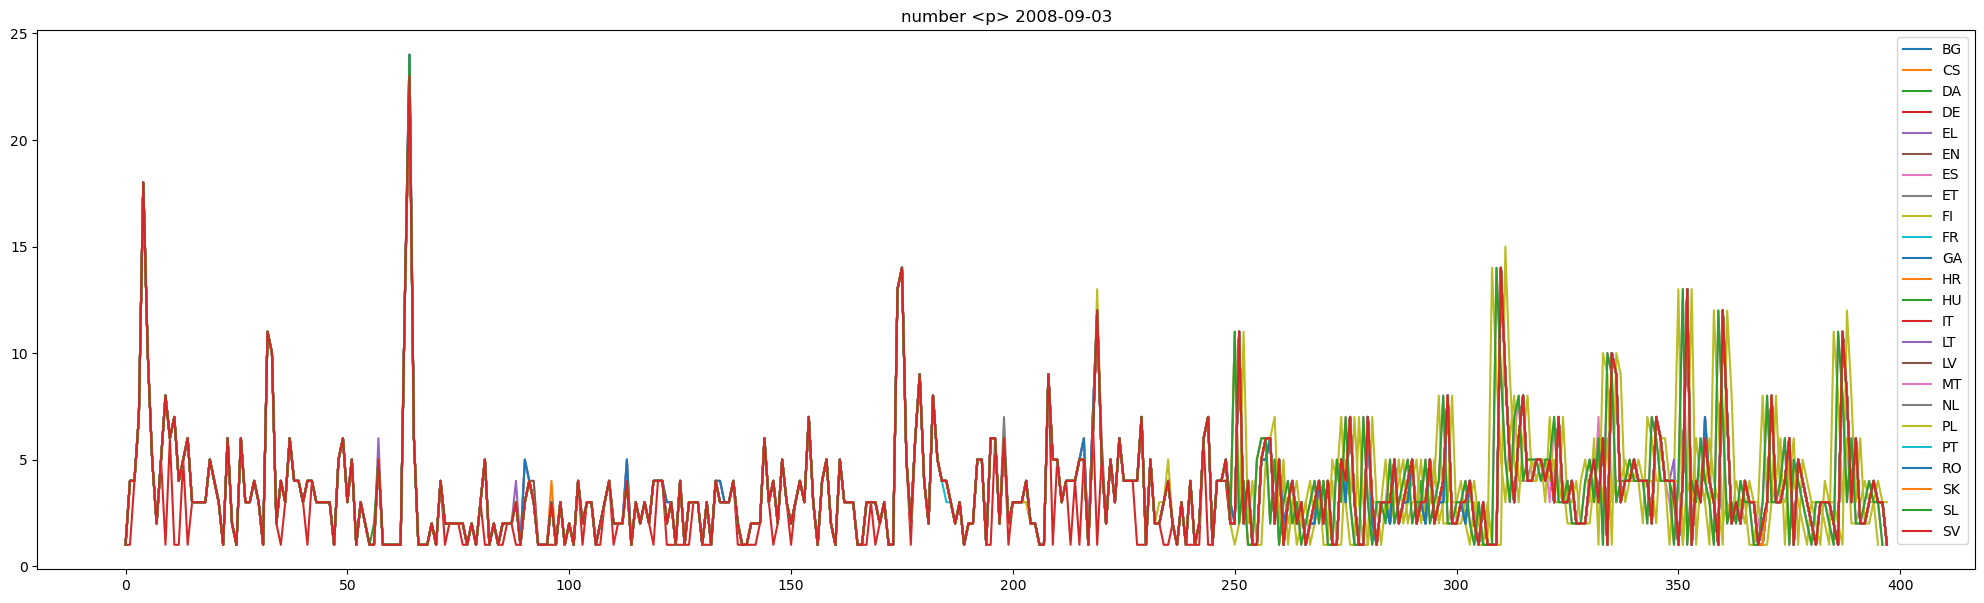

In [38]:
plt.figure(figsize=(10, 3))

compare_frame.plot(figsize = (25, 7))
plt.title('number <p> 2008-09-03')

plt.savefig('problems.png')